In [134]:
import pandas as pd 
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt 
import datetime as dt
import re

In [135]:
path = "C:/Users/shake/.jupyter/EX2/"
filename = "matala2_cosmetics_2019-Nov.csv"
datafile = path + filename

In [136]:
data_1 = pd.read_csv(datafile)
data = data_1.copy()

C:\Users\shake\AppData\Local\Temp\ipykernel_33132\64639844.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data_1 = pd.read_csv(datafile)


סעיף א

In [138]:
data['event_time'] = pd.to_datetime(data['event_time'])

In [139]:
data = data.sort_values(['user_session', 'event_time','user_id'])

In [140]:
data['duration_to_next_event'] = (data.groupby('user_session')['event_time'].diff().dt.total_seconds().shift(-1).fillna(0))

In [141]:
last_event_mask = data['user_id'] != data['user_id'].shift(-1)
data.loc[last_event_mask, 'duration_to_next_event'] = 0

סעיף ב

In [166]:
data['days_diff'] = data.groupby('user_id')['event_time'].diff().dt.days

In [167]:
colm = data['days_diff'] > 5

In [168]:
funnel_numbers = colm.groupby(data['user_id']).cumsum() + 1

In [169]:
funnel_numbers = funnel_numbers.fillna(0)

In [170]:
data['funnel_number'] = funnel_numbers

In [171]:
data['funnel_number'].value_counts()

1    3764583
2     766527
3     101191
4       3535
5          1
Name: funnel_number, dtype: int64

סעיף ג

In [180]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number', 'user_session']).cumcount() + 1

סעיף ד

In [148]:
data['price'] = data['price'].apply(lambda x: float(x) if isinstance(x,float) else float(re.sub(r'[^\d\.]+', '', x)))

סעיף ה

In [150]:
print(data['event_type'].value_counts())

view                2076132
cart                1311807
remove_from_cart     925481
purchase             322417
Name: event_type, dtype: int64


In [151]:
import matplotlib.pyplot as plt

In [152]:
event_counts = data['event_type'].value_counts()

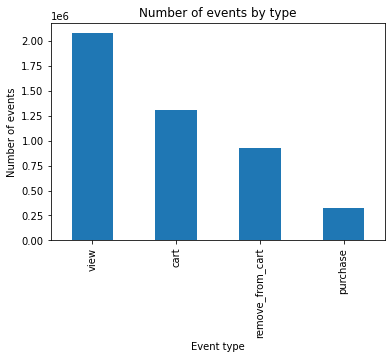

In [153]:
event_counts.plot(kind='bar')
plt.title('Number of events by type')
plt.xlabel('Event type')
plt.ylabel('Number of events')
plt.show()

סעיף ו

In [200]:
session_data = pd.DataFrame()

In [201]:
session_data['user_id'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_id'].reset_index(drop=True)

In [202]:
session_data['user_session'] = data.drop_duplicates(subset=['user_id', 'user_session'])['user_session'].reset_index(drop=True)

In [203]:
session_data['funnel_number'] = data.drop_duplicates(subset=['user_id', 'user_session'])['funnel_number'].reset_index(drop=True)

In [204]:
session_data['index_in_funnel'] = data.drop_duplicates(subset=['user_id', 'user_session'])['index_in_funnel'].reset_index(drop=True)

In [205]:
session_data['events_number'] = data.groupby(['user_id', 'user_session'])['event_time'].count().reset_index(drop=True)

In [206]:
session_data['time_of_session'] = data[['duration_to_next_event' , 'user_session']].groupby('user_session').sum().reset_index(drop=True)

In [207]:
session_data['list_of_viewed'] = data[data['event_type'] == 'view'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)

In [208]:
session_data['list_of_added_to_cart'] = data[data['event_type'] == 'cart'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)

In [209]:
session_data['list_of_purchased'] = data[data['event_type'] == 'purchase'].groupby(['user_id', 'user_session'])['product_id'].apply(list).reset_index(drop=True)

In [211]:
session_data

,user_id,user_session,funnel_number,index_in_funnel,events_number,time_of_session,list_of_viewed,list_of_added_to_cart,list_of_purchased
0,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,1,1,1.0,0.0,[5240],"[5745712, 49674, 5587748, 4590, 34763]","[5812033, 5724621, 5809910, 5811668]"
1,1458813,b16644a2-44db-4650-8156-f6f03782d432,1,1,1.0,0.0,[5814066],[5569506],"[5766379, 5614842]"
2,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,1,1,28.0,0.0,"[5800358, 5800349, 5800349, 5800358, 5712576, ...","[5896421, 5841190, 5896422, 5896419]","[5809910, 5809911, 5809912, 5862544, 5870648, ..."
3,1458813,921ff98c-a419-4132-af94-ee26880334b0,1,1,1.0,0.0,[5711087],"[5896421, 5896422]","[5850620, 5850625, 5850621, 5850619, 5816166, ..."
4,1458813,ad1a2e9e-cc14-4b98-b70b-5dd539e76bba,1,1,1.0,151.0,[5711145],"[5811668, 5811668, 5724608, 5724658, 5724658, ...","[5846442, 5686083]"
...,...,...,...,...,...,...,...,...,...
942377,579967088,670cb8b4-bef1-4ec7-bfe8-7c8317967c74,1,1,NaN,NaN,NaN,NaN,NaN
942378,579968012,547ad51a-cdf2-4a0a-b819-8061c012bcee,1,1,NaN,NaN,NaN,NaN,NaN
942379,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,1,1,NaN,NaN,NaN,NaN,NaN
942380,579968937,878af093-7570-48ae-966c-d50ce61e390c,1,1,NaN,NaN,NaN,NaN,NaN
